In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x1 = np.hstack((np.ones((m, 1)), data_x))

In [34]:
data_x1= np.hstack((
    data_x1,
    (data_x1[:, 1] ** 2).reshape((m, 1)),
    (data_x1[:, 1] ** 3).reshape((m, 1)),
    (data_x1[:, 1] ** 4).reshape((m, 1)),
    (data_x1[:, 1] ** 5).reshape((m, 1)),
    (data_x1[:, 1] ** 6).reshape((m, 1))
))

In [35]:
data_x1[:, 1:] = (data_x1[:, 1:] - np.mean(data_x1[:, 1:], axis=0)) / np.std(data_x1[:, 1:], axis=0)

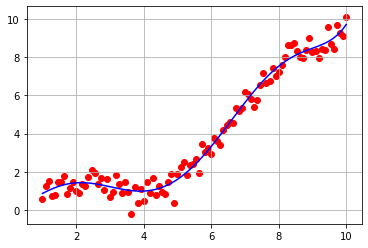

In [10]:
# fit a polynomial of order 6
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
scale=StandardScaler()
x=scale.fit_transform(data_x)
poly=PolynomialFeatures(degree=6)
x_poly =poly.fit_transform(x)
poly.fit(x_poly,data_y) 
lr = LinearRegression()

lr.fit(x_poly,data_y)
y_pred = lr.predict(x_poly)
plt.grid()
plt.scatter(data_x,data_y,color='r')
plt.plot(data_x,y_pred,color='b')

In [9]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(iters)

    for t in range(iters):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, errs
    pass


In [28]:
x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [30]:
def A(X, theta):
    return X@theta
def E(theta,X,y):
    return np.mean(np.square(A(X,theta)-y))

In [42]:
# Call stochastic gradient descent in the main loop

# LR = ...
# sample_size = ...
# epochs = ... decide a value
m,n= data_x1.shape
theta = np.zeros(n).reshape(n,1)
eta=0.01
sample_size=10
epochs=10000
err=[]
for i in range(epochs):
    idx=np.random.choice(100,sample_size,replace=False)
    x_sample=data_x1[idx]
    y_sample=data_y[idx]
    
    pred= x_sample @ theta - y_sample
    
    grad = (1/m) * x_sample.T @ ((x_sample@ theta) - y_sample)
    theta -= eta * grad
    err.append(E(theta,x_sample,y_sample))
print(theta,err)

[[ 3.80071483]
 [ 0.71860604]
 [ 0.97236631]
 [ 0.84367174]
 [ 0.52376752]
 [ 0.14306192]
 [-0.23133596]] [9.37815106462919, 28.240065717654875, 30.97364806142329, 12.725910313128253, 16.888502493853018, 29.84547593484144, 7.839560952727156, 18.744751582327787, 23.250627342810233, 24.9845683304969, 17.377306945634704, 47.751811355703104, 24.251177386403704, 31.521752889102583, 9.693915006946257, 16.54709061742559, 15.90265915686353, 23.42743195280198, 13.446495114329926, 25.215734134763995, 13.335292589819773, 7.485073605977149, 9.05451867818625, 15.874489063376979, 8.068948575266397, 11.85681253057609, 22.358475927915887, 15.25962176562697, 32.15407507819258, 28.51060372237999, 19.839282660667443, 34.994144589057086, 15.741346558141576, 15.595731745170136, 24.038596123691747, 21.153069750325017, 18.351627442925416, 23.79540556161077, 10.948928500846165, 13.69816959630198, 13.48354004294598, 20.0540026851453, 17.89906744268616, 15.37141247860103, 25.897403225601956, 11.131333275911093,

In [ ]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

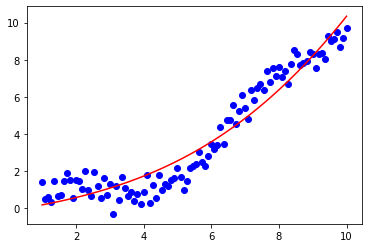

In [43]:
coeffs=theta
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, data_x1@ coeffs,'r-')